In [11]:
import numpy as np
import matplotlib.pyplot as plt

def dorokhov_distribution(N, T_min=1e-4, T_max=0.999):
    """
    Generate N transmission eigenvalues T_i using the Dorokhov distribution:
        P(T) ∝ 1 / (T * sqrt(1 - T))
    using inverse transform sampling over a specified range.
    """
    u = np.random.uniform(0, 1, N)
    T = T_min * ((T_max / T_min) ** u)  # Log-uniform sampling
    return T

def plot_abs_energies_vs_channel(phi, N=100, Delta=1.0):
    """
    Compute and plot the ABS energies for N channels at phase phi.
    """
    T = dorokhov_distribution(N)
    E = andreev_bound_state_energies(phi, T, Delta)

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, N+1), E, 'o', color='orange')
    plt.xlabel('Channel index')
    plt.ylabel('ABS energy (Δ units)')
    plt.title(f'ABS energies at φ = {phi:.2f} rad ({N} channels, Dorokhov-distributed T)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_abs_energy_histograms(N=1000, Delta=1.0, phi_values=None):
    """
    Plot histograms of ABS energies across multiple phi values.
    Also overlay theoretical density of states assuming Dorokhov-distributed T.
    """
    if phi_values is None:
        phi_values = [np.pi/4, np.pi/2, 3*np.pi/4, np.pi]

    T = dorokhov_distribution(N)
    plt.figure(figsize=(12, 8))

    for i, phi in enumerate(phi_values, 1):
        E = andreev_bound_state_energies(phi, T, Delta)

        plt.subplot(2, 2, i)
        plt.hist(E, bins=50, range=(0, Delta), density=True, alpha=0.7, label='Simulated ABS')

        # Theoretical DOS from Dorokhov distribution for comparison
        theta = phi / 2
        E_vals = np.linspace(0.01, Delta, 1000)
        sin2theta = np.sin(theta)**2
        T_of_E = 1 - (E_vals / Delta)**2
        with np.errstate(divide='ignore', invalid='ignore'):
            rho = 1 / (np.sqrt(1 - T_of_E) * np.sqrt(T_of_E) * sin2theta)
            rho[np.isnan(rho)] = 0
            rho[np.isinf(rho)] = 0
            rho[E_vals >= Delta] = 0
        plt.plot(E_vals, rho / np.max(rho), 'r--', lw=2, label='Theoretical DOS (up to norm)')

        plt.title(f'ABS Energy Histogram (φ = {phi:.2f} rad)')
        plt.xlabel('ABS Energy (Δ units)')
        plt.ylabel('Density (normalized)')
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()

def andreev_bound_state_energies(phi, T, Delta=50.0):
    """
    Compute ABS energies in GHz for given phi and transmission values T.
    
    Args:
        phi (float): Superconducting phase difference [radians]
        T (np.ndarray): Transmission eigenvalues
        Delta (float): Superconducting gap in GHz (e.g. ~50 GHz for Al)
    
    Returns:
        np.ndarray: ABS energies in GHz
    """
    return Delta * np.sqrt(1 - T * np.sin(phi / 2)**2)

def plot_abs_energy_histogram_real_units(phi_flux, N=1000, Delta_GHz=50.0):
    """
    Plot histogram of ABS energies at a given phase (in flux quanta), using physical units.
    
    Args:
        phi_flux (float): Phase in normalized flux quanta (e.g., 0.49 Φ0 -> φ = 0.49 * 2π)
        N (int): Number of channels
        Delta_GHz (float): Superconducting gap in GHz
    """
    phi = phi_flux * 2 * np.pi
    T = dorokhov_distribution(N)
    E_GHz = andreev_bound_state_energies(phi, T, Delta=Delta_GHz)

    plt.figure(figsize=(8, 5))
    plt.hist(E_GHz, bins=50, density=True, alpha=0.75, color='skyblue', edgecolor='k')
    plt.xlabel('ABS Energy (GHz)')
    plt.ylabel('Normalized Density')
    plt.title(f'ABS Energy Distribution at φ = {phi_flux:.2f} Φ₀ (Δ = {Delta_GHz} GHz)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_abs_energy_vs_tau(phi_flux, N=450, Delta_GHz=50.0):
    """
    Plot ABS energy (in GHz) as a function of channel transparency Tau.
    
    Args:
        phi_flux (float): Phase in normalized flux quanta
        N (int): Number of transmission channels
        Delta_GHz (float): Superconducting gap in GHz
    """
    phi = phi_flux * 2 * np.pi
    T = dorokhov_distribution(N)
    E_GHz = andreev_bound_state_energies(phi, T, Delta=Delta_GHz)

    plt.figure(figsize=(8, 5))
    plt.scatter(T, E_GHz, alpha=0.6, edgecolor='k')
    plt.xlabel('Transmission eigenvalue (τ)')
    plt.ylabel('ABS Energy (GHz)')
    plt.title(f'ABS Energy vs. τ at φ = {phi_flux:.2f} Φ₀ (Δ = {Delta_GHz} GHz)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()




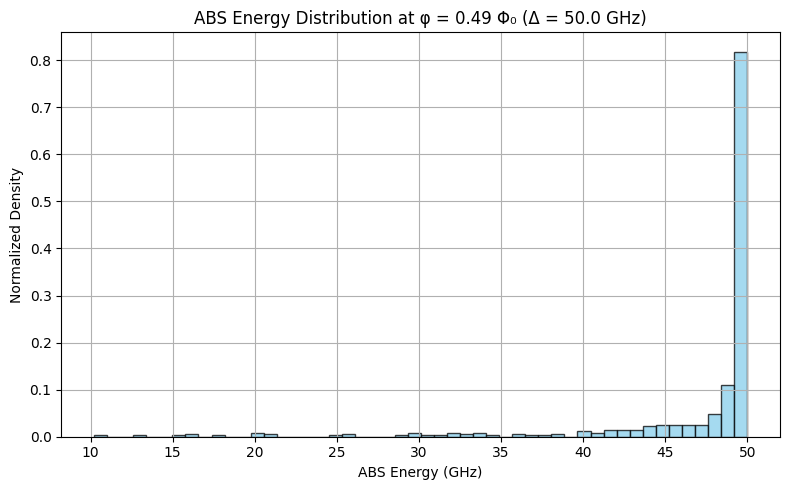

In [12]:
# Plot for φ = 0.49 Φ₀
plot_abs_energy_histogram_real_units(phi_flux=0.49, N=450, Delta_GHz=50.0)

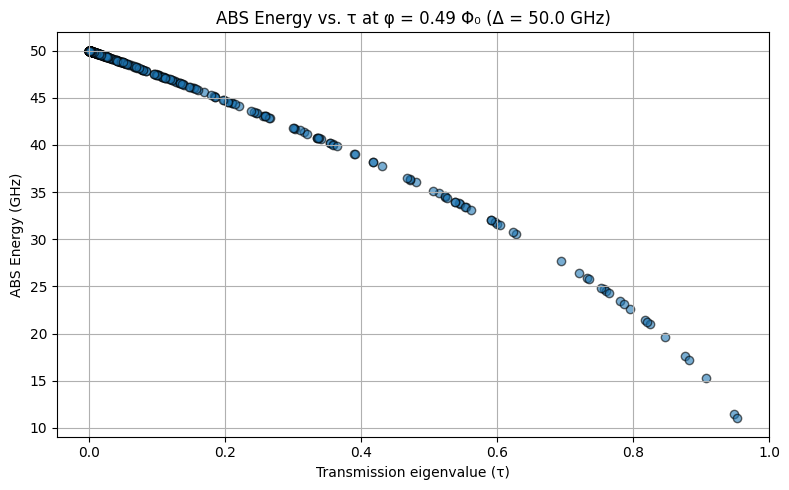

In [13]:
# Generate the plot
plot_abs_energy_vs_tau(phi_flux=0.49, N=450, Delta_GHz=50.0)